## Lineare Regression mit Python

#### Beispiel:
Wir nehmen an, dass wir den Druck $p$ eines idealen Gases in einem festen Behälter (Volumen $V$) in abhängigkeit der Temperatur $T$ (in Celsius) gemessen haben. Nach dem idealen Gasgesetz ($pV=nR(T+T_0$) sollte hier ein linearer Zusammenhang bestehen, aus dem wir den absoluten Nullpunkt $T_0$ (in Celsius) bestimmen können, sofern $V, n, R$ bekannt sind:
$$p(T) = \frac{nR}{V}(T +  T_0)$$
oder
$ p(t) = aT+b$, mit $a=\frac{nR}{V}$ und $b = \frac{nR}{V}T_0$


In [1]:
import numpy as np   # Numerische Operationen (Wir benötigen: linspace, random)
# Anzahl Messpunkte N:
N=10
# Temperaturen T, von -20 bis 100  (N Werte)
T = np.linspace(-20,100,N) 
#
# Wir erzeugen synthetische Beispielmessdaten:
#
# Lineare Druckzunahme Steigung s
s = 2.1
# p=0 am absoluten Nullpunkt (T0 = -273.15 C) 
T0=-273.15 # [C]
p = s*(T -T0) #[Pa]
# Die Druckmessung sei nicht perfekt sondern streue zufällig.
# Diese Streuung sei normalverteilt um den wahren Wert
# mit Standardabweichung sigma_p
sigma_p = 15
p = p + np.random.normal(0,sigma_p,N)

Grafik der Daten

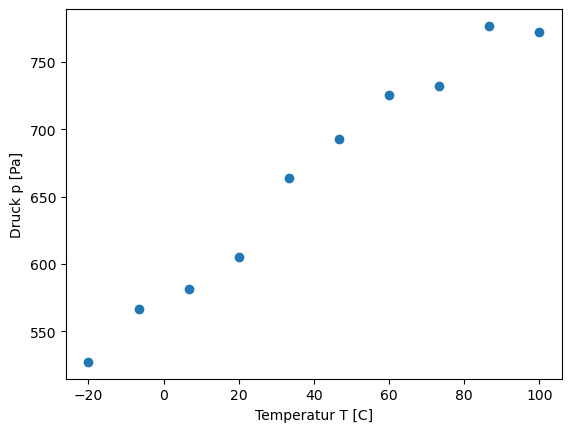

In [2]:
import matplotlib.pyplot as plt # for plotting
plt.xlabel('Temperatur T [C]')
plt.ylabel('Druck p [Pa]')
#plt.axis([-300, 150, 0, 900])
plt.plot(T,p,'o')

Besser und im Praktikum erwünscht ist eine Darstellung mit Indikation der Unsicherheiten:
### Graphik mit Fehlerbalken

<ErrorbarContainer object of 3 artists>

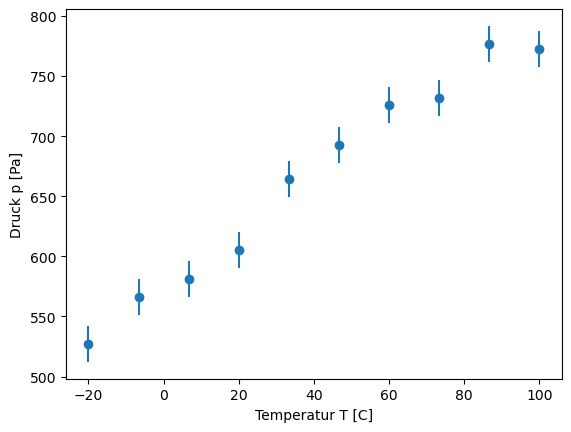

In [3]:
plt.xlabel('Temperatur T [C]')
plt.ylabel('Druck p [Pa]')
plt.errorbar(T,p,yerr=sigma_p,fmt='o')

### Linear Regression 
#### Unter Benutzung der *linregress* Funktion im *Scipy.stats* Paket

Man beachte, dass hier die Unsicherheiten statistisch, das heisst durch die Streuung der Daten ermittelt wird und *nicht* durch Fehlerfortpflanzung.

In [4]:
# Laden von linregress
from scipy.stats import linregress

res = linregress(T,p) 
print(res)

LinregressResult(slope=2.191805935856387, intercept=576.6845502442417, rvalue=0.9876114589587026, pvalue=1.0152843221690022e-07, stderr=0.1231251614203268, intercept_stderr=6.818362693198178)


__Besser formatiert__

In [5]:
print("Steigung: a = {:5.2} \u00B1 {:5.2}, Achsenabschnitt b = {:5.1f} \u00B1 {:5.1f}".format(res.slope, res.stderr, res.intercept, res.intercept_stderr))

Steigung: a =   2.2 ±  0.12, Achsenabschnitt b = 576.7 ±   6.8


In [6]:
from uncertainties import ufloat

a = ufloat(res.slope, res.stderr)
b = ufloat(res.intercept, res.intercept_stderr)
print('Steigung: a = {:P}[Pa/C]\nAchsenabschnitt: b = {:P}[Pa]'.format(a,b))

Steigung: a = 2.19±0.12[Pa/C]
Achsenabschnitt: b = 577±7[Pa]


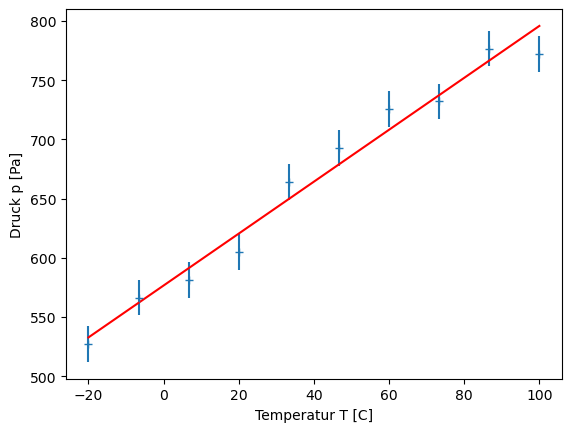

In [7]:
plt.errorbar(T,p,yerr=sigma_p,fmt='+')
plt.xlabel('Temperatur T [C]')
plt.ylabel('Druck p [Pa]')
plt.plot(T, a.n*T+b.n,'r') # ".n" waehlt nur den Nominalwert ohne Standardabweichung aus. (".s " nur die Standardabweichung)

<function matplotlib.pyplot.show(close=None, block=None)>

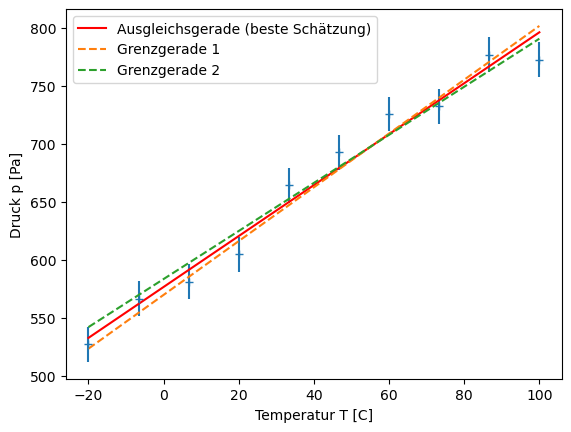

In [8]:
plt.errorbar(T,p,yerr=sigma_p,fmt='+')
plt.plot(T, a.n*T+b.n,'r', label="Ausgleichsgerade (beste Schätzung)")
plt.xlabel('Temperatur T [C]')
plt.ylabel('Druck p [Pa]')
plt.plot(T,(a.n+a.s)*T+b.n-b.s,'--', label="Grenzgerade 1")
plt.plot(T,(a.n-a.s)*T+b.n+b.s,'--', label="Grenzgerade 2")
plt.legend(loc='upper left')
plt.show

Am absoluten Nullpunkt $T_0$ ist $p=0$. Also  folgt aus 
$ p(T) = aT+b \Rightarrow =aT_0+b$
$\Rightarrow\;T_0 = -b/a$

Das *Uncertainties* Paket gibt uns bei der Berechnung von `T_0 = -b/a` sofort auch die Unsicherheit:

In [9]:
T_0 = -b/a
print("Berechneter absoluter Nullpunkt T_0 = {:P} [C]".format(T_0))

Berechneter absoluter Nullpunkt T_0 = -263±15 [C]


#### Warum dieser Wert recht ungenau ist illustriert die folgende Graphik

<function matplotlib.pyplot.show(close=None, block=None)>

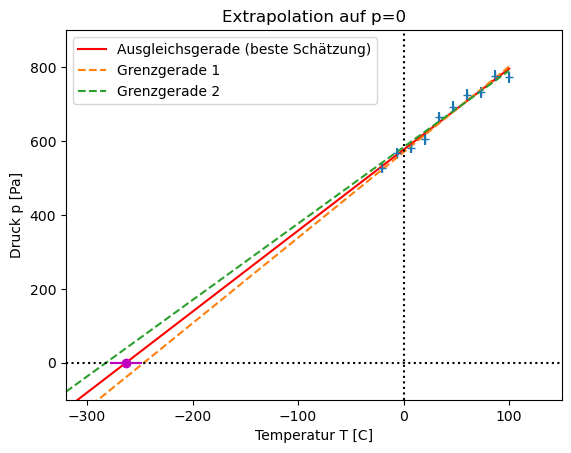

In [10]:
T1 = np.append(-320,T)
plt.errorbar(T,p,yerr=sigma_p,fmt='+')
plt.plot(T1, a.n*T1+b.n,'r', label="Ausgleichsgerade (beste Schätzung)")
plt.xlabel('Temperatur T [C]')
plt.ylabel('Druck p [Pa]')
plt.plot(T1,(a.n+a.s)*T1+b.n-b.s,'--', label="Grenzgerade 1")
plt.plot(T1,(a.n-a.s)*T1+b.n+b.s,'--', label="Grenzgerade 2")
plt.legend(loc='upper left')
plt.title('Extrapolation auf p=0')
plt.axis([-320, 150, -100, 900])
plt.plot([-320,150],[0,0],'k:')
plt.plot([0,0],[-100,900],'k:')
plt.errorbar(T_0.n,0,xerr=T_0.s,fmt='om')
plt.show